In [24]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)
print(test.shape)

(15120, 56)
(565892, 55)


In [6]:
train.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In [7]:
train_skew = train.skew()
train_skew

Id                                     0.00000
Elevation                              0.07564
Aspect                                 0.45094
Slope                                  0.52366
Horizontal_Distance_To_Hydrology       1.48805
Vertical_Distance_To_Hydrology         1.53778
Horizontal_Distance_To_Roadways        1.24781
Hillshade_9am                         -1.09368
Hillshade_Noon                        -0.95323
Hillshade_3pm                         -0.34083
Horizontal_Distance_To_Fire_Points     1.61710
Wilderness_Area1                       1.23124
Wilderness_Area2                       5.22878
Wilderness_Area3                       0.32459
Wilderness_Area4                       0.82580
Soil_Type1                             6.29472
Soil_Type2                             4.61702
Soil_Type3                             3.57600
Soil_Type4                             3.87272
Soil_Type5                             9.41621
Soil_Type6                             4.50672
Soil_Type7   

In [7]:
test_skew = test.skew()
test_skew

Id                                    -0.00000
Elevation                             -0.81659
Aspect                                 0.40142
Slope                                  0.79411
Horizontal_Distance_To_Hydrology       1.13316
Vertical_Distance_To_Hydrology         1.79769
Horizontal_Distance_To_Roadways        0.70191
Hillshade_9am                         -1.18414
Hillshade_Noon                        -1.06223
Hillshade_3pm                         -0.26662
Horizontal_Distance_To_Fire_Points     1.28125
Wilderness_Area1                       0.18275
Wilderness_Area2                       4.03890
Wilderness_Area3                       0.25605
Wilderness_Area4                       3.81894
Soil_Type1                            14.43867
Soil_Type2                             8.88833
Soil_Type3                            11.98223
Soil_Type4                             6.78258
Soil_Type5                            19.80355
Soil_Type6                             9.61875
Soil_Type7   

In [8]:
skew_dif = (abs(train_skew-test_skew)).sort_values(ascending=False)
skew_dif

Soil_Type15                          434.31402
Soil_Type25                           88.41784
Soil_Type7                            73.39262
Soil_Type8                            66.60575
Soil_Type36                           33.18290
Soil_Type14                           26.93552
Soil_Type37                           25.24705
Soil_Type9                            16.60761
Soil_Type28                           16.44108
Soil_Type5                            10.38734
Soil_Type17                            9.42119
Soil_Type27                            8.78369
Soil_Type3                             8.40623
Soil_Type1                             8.14395
Soil_Type34                            7.36933
Soil_Type19                            6.24338
Soil_Type35                            5.64807
Soil_Type6                             5.11203
Soil_Type21                            4.51421
Soil_Type2                             4.27131
Soil_Type12                            3.96710
Wilderness_Ar

In [63]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000,15120.00000
mean,7560.50000,2749.32255,156.67665,16.50159,227.19570,51.07652,1714.02321,212.70430,218.96561,135.09200,1511.14729,0.23790,0.03300,0.41991,0.30919,0.02348,0.04120,0.06362,0.05575,0.01091,0.04299,0.00000,0.00007,0.00066,0.14167,0.02685,0.01501,0.03148,0.01118,0.00000,0.00754,0.04048,0.00397,0.00304,0.00919,0.00106,0.02282,0.05007,0.01700,0.00007,0.00357,0.00099,0.00060,0.08538,0.04795,0.02196,0.04563,0.04074,0.00146,0.00675,0.00066,0.00225,0.04815,0.04345,0.03036,4.00000
std,4364.91237,417.67819,110.08580,8.45393,210.07530,61.23941,1325.06636,30.56129,22.80197,45.89519,1099.93649,0.42581,0.17865,0.49356,0.46218,0.15142,0.19877,0.24409,0.22945,0.10390,0.20284,0.00000,0.00813,0.02571,0.34872,0.16166,0.12161,0.17462,0.10513,0.00000,0.08651,0.19708,0.06287,0.05508,0.09544,0.03251,0.14933,0.21809,0.12927,0.00813,0.05966,0.03148,0.02439,0.27946,0.21367,0.14655,0.20870,0.19770,0.03812,0.08186,0.02571,0.04737,0.21409,0.20388,0.17157,2.00007
min,1.00000,1863.00000,0.00000,0.00000,0.00000,-146.00000,0.00000,0.00000,99.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25%,3780.75000,2376.00000,65.00000,10.00000,67.00000,5.00000,764.00000,196.00000,207.00000,106.00000,730.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000
50%,7560.50000,2752.00000,126.00000,15.00000,180.00000,32.00000,1316.00000,220.00000,223.00000,138.00000,1256.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000
75%,11340.25000,3104.00000,261.00000,22.00000,330.00000,79.00000,2270.00000,235.00000,235.00000,167.00000,1988.25000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

In [64]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


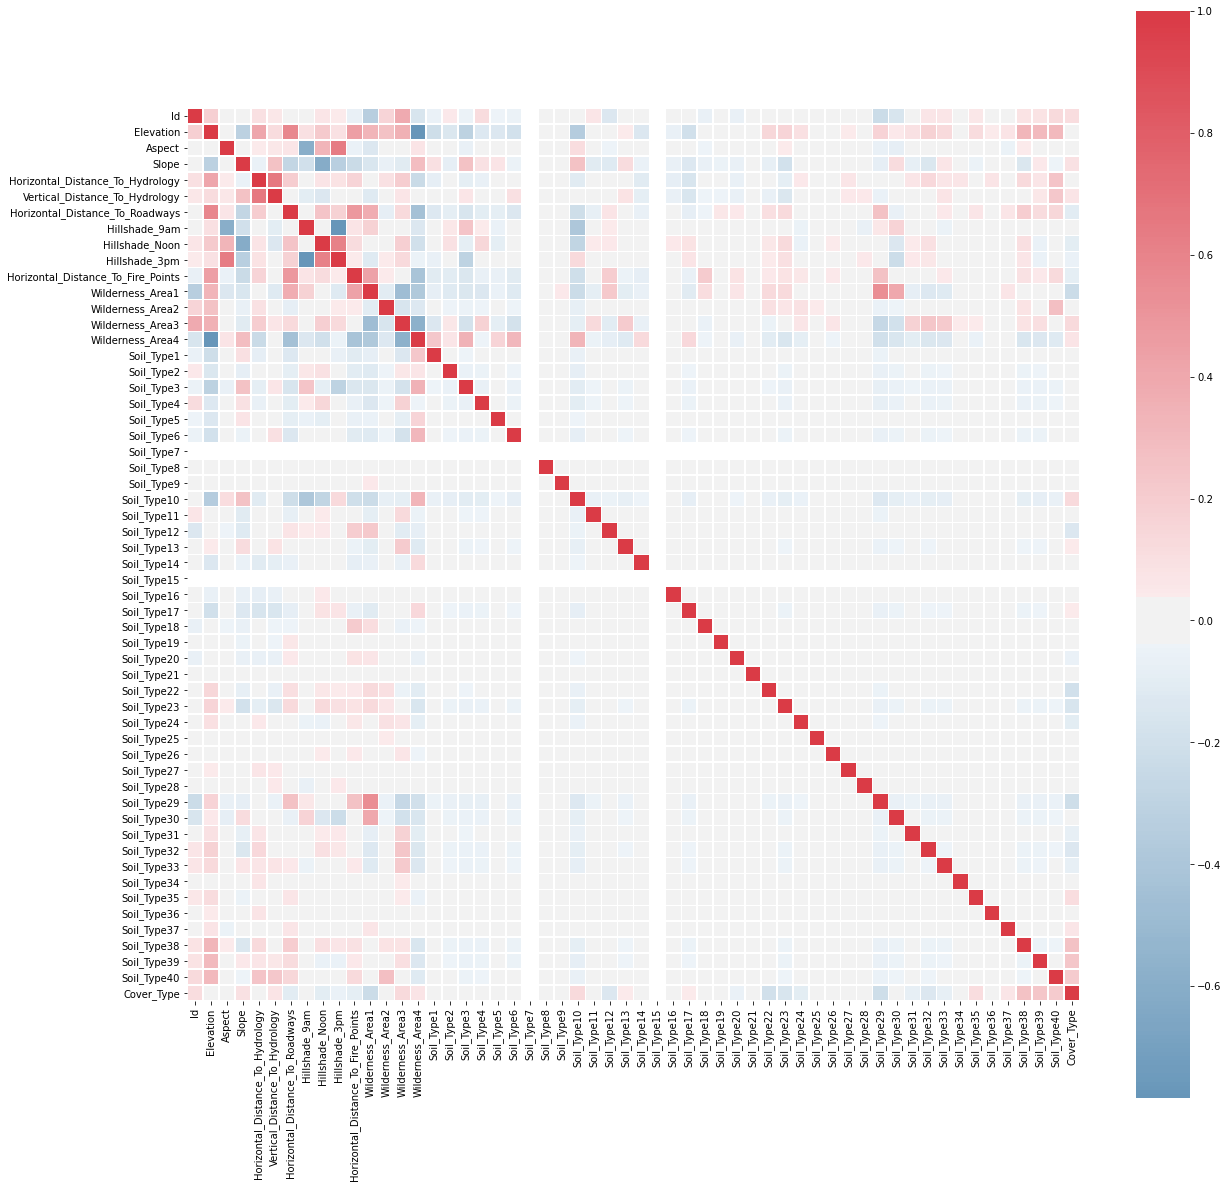

In [9]:
correlation = train.corr()
f, x = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(correlation, cmap=cmap, center=0, square=True, linewidths=.5)

In [10]:
correlation

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.00000,0.18550,0.01770,-0.02017,0.09964,0.05535,-0.03303,0.00079,0.07312,0.04252,-0.06874,-0.33986,0.15848,0.38422,-0.15845,-0.05845,0.04555,-0.04576,0.11821,-0.04171,-0.04602,nan,-0.01316,-0.01422,0.03229,0.06337,-0.12993,0.01514,-0.01603,nan,-0.00379,-0.00294,-0.07025,-0.02971,-0.06954,0.01473,0.03574,-0.01742,0.03402,0.00567,0.03118,0.02414,-0.00510,-0.23178,-0.15752,0.02583,0.06805,0.06689,0.02252,0.05748,0.00911,0.01604,0.08693,0.08338,0.12247,0.10836
Elevation,0.18550,1.00000,-0.01110,-0.31264,0.41271,0.12209,0.57866,0.09790,0.21578,0.08952,0.44356,0.33042,0.26173,0.35403,-0.78365,-0.21882,-0.14795,-0.30752,-0.12534,-0.14148,-0.18735,nan,0.00293,-0.01057,-0.35782,-0.03791,0.01743,0.03930,-0.14062,nan,-0.06625,-0.20066,-0.03517,0.02981,0.00855,0.03251,0.14624,0.15987,0.09765,0.01059,0.02067,0.04002,-0.00108,0.16530,0.04820,0.09319,0.17235,0.12382,0.02188,0.12016,0.04057,0.07383,0.32344,0.29641,0.30676,0.01609
Aspect,0.01770,-0.01110,1.00000,0.02815,0.04073,0.05641,0.06618,-0.59400,0.32491,0.63502,-0.05217,-0.13126,0.02824,0.03258,0.07523,-0.02454,-0.02097,-0.06912,0.01802,0.00034,-0.00607,nan,0.00172,-0.01939,0.11196,-0.03455,-0.04414,0.02431,0.00118,nan,0.02712,0.02987,-0.04214,0.00757,-0.02333,0.01881,0.02230,0.04188,0.00548,-0.00234,-0.00977,0.01899,0.02633,-0.06343,-0.08690,0.00816,0.00370,0.01872,0.01293,-0.00424,0.00316,-0.04631,0.04386,-0.03134,0.00721,0.00801
Slope,-0.02017,-0.31264,0.02815,1.00000,-0.05598,0.26531,-0.27705,-0.20007,-0.61261,-0.32689,-0.23953,-0.15282,-0.06592,-0.11303,0.28699,0.09936,-0.08150,0.26554,0.08784,0.07472,-0.04787,nan,-0.01299,-0.02222,0.25580,-0.10980,-0.11509,0.11986,-0.05408,nan,-0.06432,-0.12437,-0.06933,-0.04774,-0.06851,-0.03393,-0.07639,-0.18453,0.01798,0.01106,-0.03070,0.01230,0.03608,-0.08311,0.11872,-0.07685,-0.14726,0.07203,-0.03059,-0.04885,-0.00457,0.00313,-0.14834,0.05190,-0.04351,0.08772
Horizontal_Distance_To_Hydrology,0.09964,0.41271,0.04073,-0.05598,1.00000,0.65214,0.20340,-0.03380,0.08005,0.08083,0.15882,-0.00940,0.08748,0.20053,-0.23930,-0.08477,0.02423,-0.08958,-0.05940,-0.02525,0.02120,nan,0.00282,-0.00552,-0.11285,0.02615,0.03431,0.02659,-0.11188,nan,-0.08480,-0.15972,-0.01828,-0.03395,-0.06287,-0.02521,-0.00784,-0.08796,0.04692,-0.00461,0.02788,0.06462,0.01966,0.03385,-0.03254,0.06089,0.13827,0.06212,0.07249,-0.01545,0.07725,-0.00955,0.13144,0.06628,0.24230,-0.01052
Vertical_Distance_To_Hydrology,0.05535,0.12209,0.05641,0.26531,0.65214,1.00000,0.01155,-0.09593,-0.13295,-0.03556,-0.01505,-0.11784,0.01711,0.06988,0.02732,-0.03431,0.00544,0.07041,-0.01654,0.01855,0.09470,nan,-0.00705,-0.01461,0.01830,-0.02936,-0.03324,0.08531,-0.08744,nan,-0.07020,-0.15557,-0.03974,-0.04090,-0.06571,-0.02220,-0.06412,-0.14432,0.01715,-0.01170,-0.01631,0.04730,0.04629,-0.05627,-0.00008,0.00625,0.02030,0.07717,0.02891,-0.02166,0.01568,-0.02072,-0.00899,0.05898,0.22711,0.07565
Horizontal_Distance_To_Roadways,-0.03303,0.57866,0.06618,-0.27705,0.20340,0.01155,1.00000,-0.00340,0.24068,0.17388,0.48639,0.36779,-0.08076,0.12438,-0.44045,-0.12263,-0.09247,-0.15943,-0.09492,-0.09142,-0.13527,nan,0.01848,-0.01905,-0.21306,-0.07947,0.07698,0.00232,-0.07171,nan,-0.01496,-0.08080,-0.04119,0.05910,0.04644,-0.00471,0.10796,0.13257,0.02244,-0.00664,0.02509,0.

In [11]:
train.drop(['Id'], inplace = True, axis = 1 )
train.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )

In [12]:
train_sub=train.iloc[:,:10]
cols_train_sub=train_sub.columns 
correlation_data = train_sub.corr()
threshold = 0.4
correlation_list = []
for i in range(0,10):
    for j in range(i+1,10):
        if (correlation_data.iloc[i,j] >= threshold and correlation_data.iloc[i,j] < 1) or (correlation_data.iloc[i,j] < 0 and correlation_data.iloc[i,j] <= -threshold):
            correlation_list.append([correlation_data.iloc[i,j],i,j])            
short_correlation_list = sorted(correlation_list,key=lambda x: -abs(x[0]))
for v,i,j in short_correlation_list:
    print ("%s and %s = %.2f" % (cols_train_sub[i],cols_train_sub[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58
Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points = 0.49
Elevation and Horizontal_Distance_To_Fire_Points = 0.44
Elevation and Horizontal_Distance_To_Hydrology = 0.41


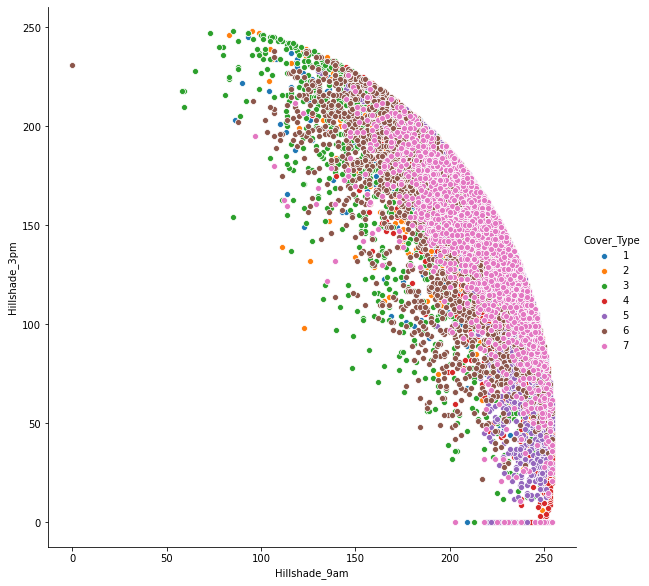

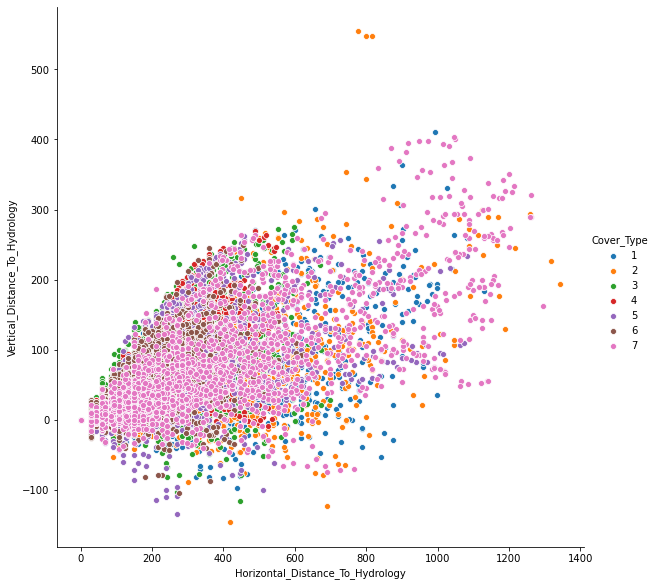

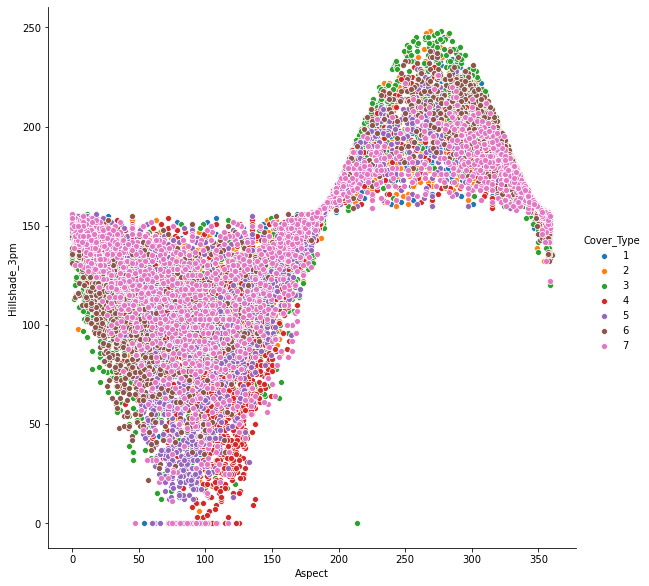

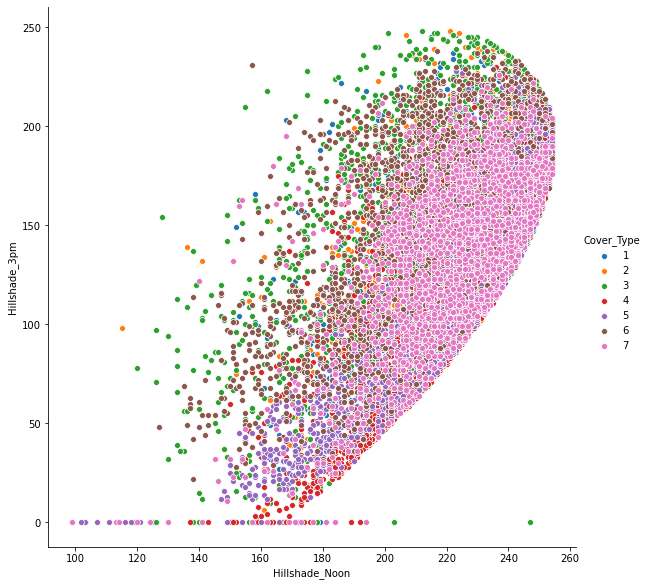

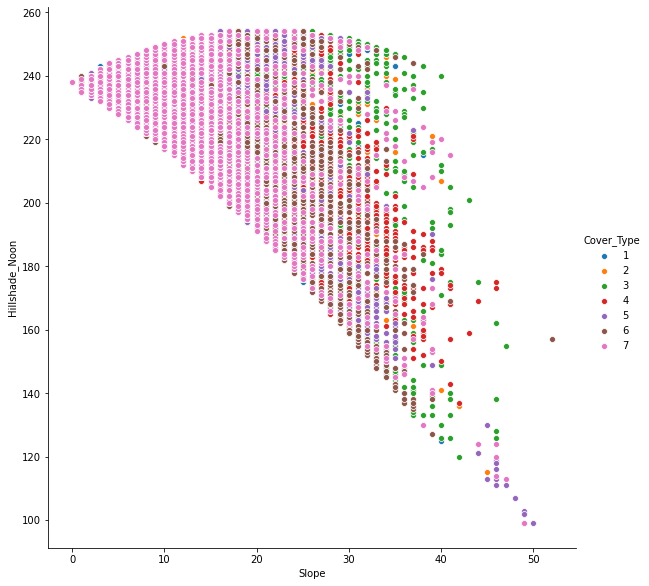

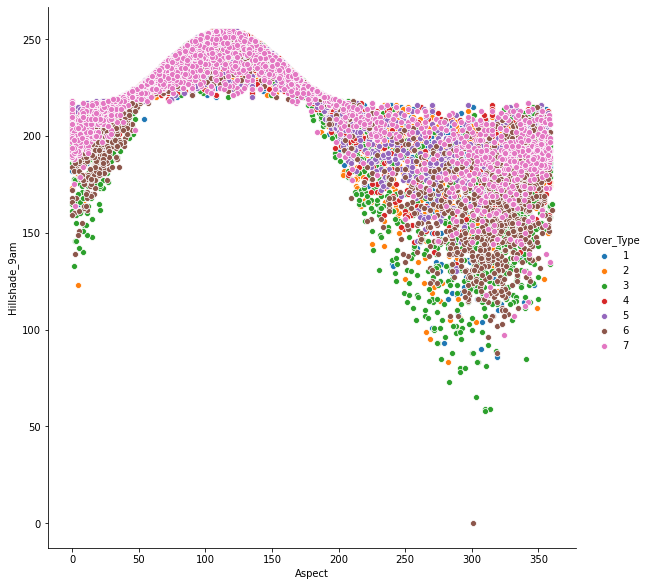

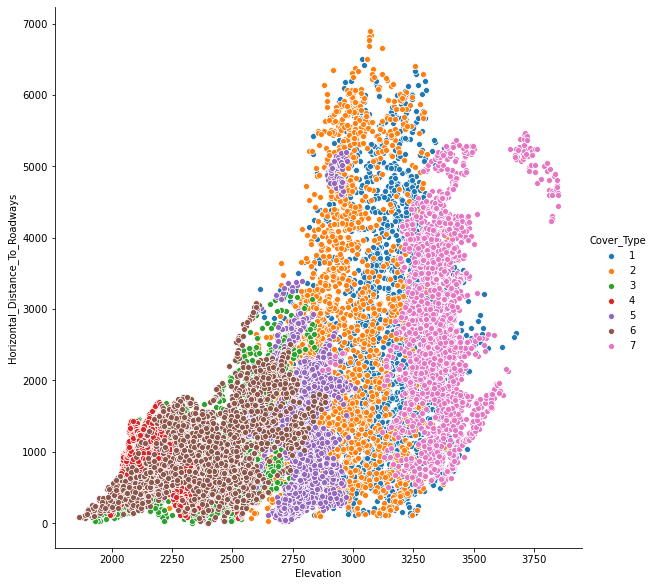

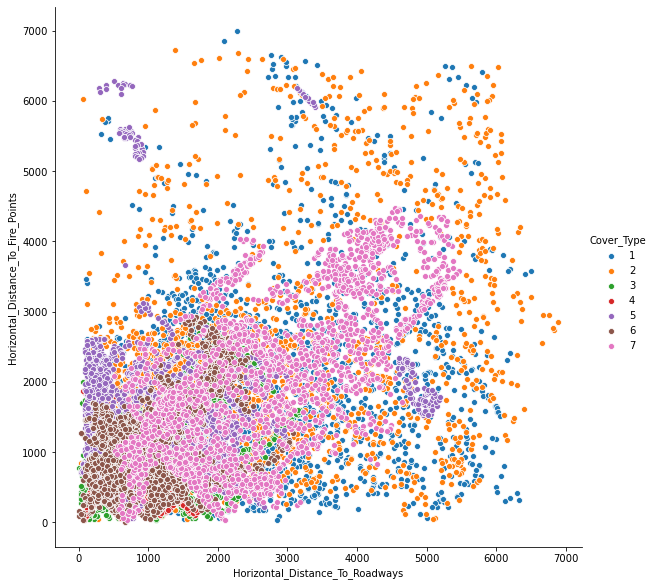

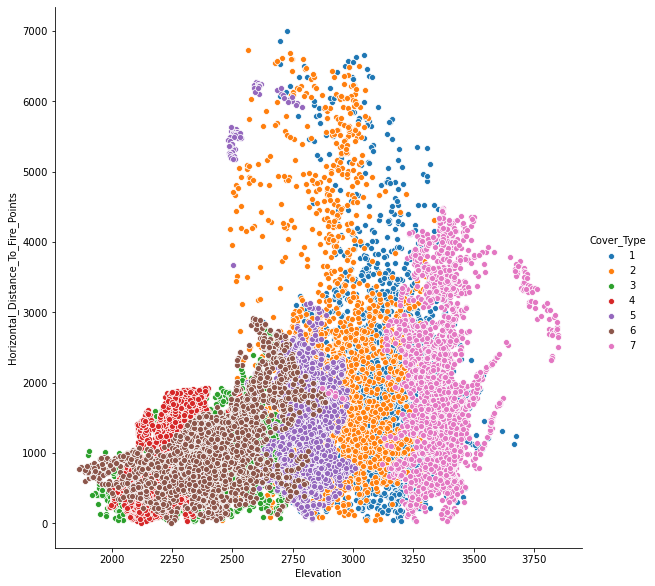

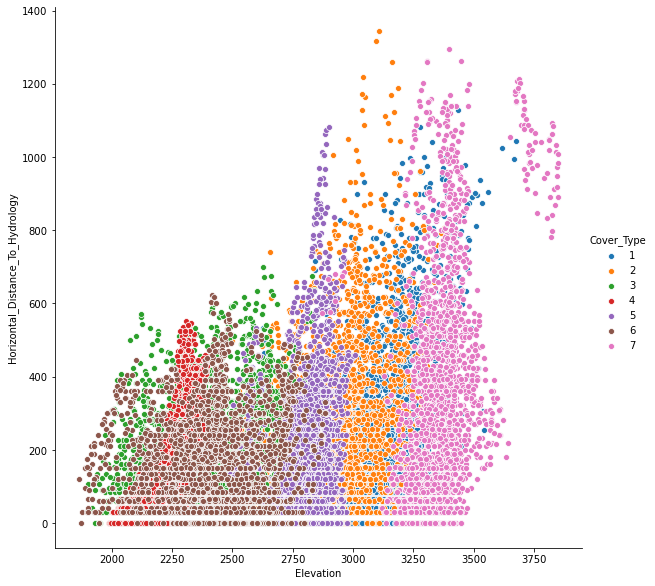

In [13]:
for v,i,j in short_correlation_list:
    sns.pairplot(train, hue="Cover_Type", height=8, x_vars=cols_train_sub[i],y_vars=cols_train_sub[j] )
    plt.show()

In [16]:
#Train
train['HF1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['HF2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HR1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['HR2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['FR1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['FR2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])
train['EV1'] = abs(train.Elevation+train.Vertical_Distance_To_Hydrology)
train['EV2'] = abs(train.Elevation-train.Vertical_Distance_To_Hydrology)
train['AHD'] = (train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5
train.AHD=train.AHD.map(lambda x: 0 if np.isinf(x) else x)
train['MAD']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Roadways)/3
train['MFH']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology)/2
train['MHS']=(train.Hillshade_9am+ train.Hillshade_Noon + train.Hillshade_3pm)/3 

# Test
test['HF1'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points']
test['HF2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HR1'] = abs(test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['HR2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['FR1'] = abs(test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['FR2'] = abs(test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])
test['EV1'] = abs(test.Elevation+test.Vertical_Distance_To_Hydrology)
test['EV2'] = abs(test.Elevation-test.Vertical_Distance_To_Hydrology)
test['AHD'] = (test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)**0.5
test.AHD=test.AHD.map(lambda x: 0 if np.isinf(x) else x)
test['MAD']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways)/3
test['MFH']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology)/2
test['MHS']=(test.Hillshade_9am+ test.Hillshade_Noon + test.Hillshade_3pm)/3

In [21]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
y = train['Cover_Type']
x = train.drop(['Cover_Type'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values,test_size=0.05,random_state=1)

In [22]:
unique, count= np.unique(y_train, return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {1: 2041, 2: 2048, 3: 2060, 4: 2056, 5: 2055, 6: 2052, 7: 2052}  



In [28]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()
etf.fit(x_train,y_train)
z = etf.feature_importances_
df = pd.DataFrame()

df['values'] = z
df['column'] = list(x.columns.values)
df.sort_values(by='values', ascending=False, inplace = True)
df.head(30)

,values,column
59,0.09025,EV2
0,0.08781,Elevation
58,0.06820,EV1
13,0.04963,Wilderness_Area4
55,0.03130,HR2
56,0.03106,FR1
5,0.02935,Horizontal_Distance_To_Roadways
54,0.02918,HR1
61,0.02917,MAD
57,0.02623,FR2


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
etf = ExtraTreesClassifier(n_estimators=250, random_state=1)

etf.fit(x_train, y_train)
print('Accuracy on training set: {:.2f}'.format(etf.score(x_train, y_train) * 100))
print('Accuracy on test set: {:.2f}'.format(etf.score(x_test, y_test) * 100))

Accuracy on training set: 100.00
Accuracy on test set: 90.48


In [35]:
id = test['Id']
test.drop(['Id'] , inplace = True , axis = 1)

test = scaler.transform(test)

In [36]:
predictions = etf.predict(test)

In [37]:
out = pd.DataFrame()
out['Id'] = id
out['Cover_Type'] = predictions
out.to_csv('submission.csv', index=False)